# **Анализ и визуализация аудиоданных с помощью спектрограмм и MFCC**

Мы будем анализировать аудиодатасет, состоящий из файлов различных форматов (.wav, .mp3, .ogg и др.). Для каждого аудиофайла мы:

- Построим **волновую форму**.
- Визуализируем **спектрограмму**.
- Извлечем и отобразим **MFCC (Mel-Frequency Cepstral Coefficients)**.
- Воспроизведем аудиофайлы для их прослушивания.

Мы будем использовать такие библиотеки, как `librosa`, `matplotlib` и `IPython.display`.

## 1. библиотек

- `librosa` — библиотека для анализа аудиоданных.
- `matplotlib.pyplot` — для построения графиков.
- `os` — для работы с файлами в директориях.
- `IPython.display.Audio` — позволяет воспроизводить звук прямо в Jupyter-ноутбуке.

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Audio  


## 2. Загрузка и воспроизведение аудиофайлов

- Функция `load_audio` загружает аудиофайл, возвращая сигнал (`y`) и частоту дискретизации (`sr`).
- Функция `play_audio` позволяет воспроизвести аудиофайл прямо в ноутбуке.

In [3]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)  
    return y, sr

def play_audio(y, sr):
    return Audio(data=y, rate=sr) 

## 3. Построение волновой формы

- Функция `plot_waveform` использует `librosa.display.waveshow` для визуализации сигнала во временной области.

In [4]:
def plot_waveform(y, sr, file_name):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)  
    plt.title(f'Waveform - {file_name}')
    plt.tight_layout()
    plt.show()


## 4. Построение спектрограммы

- Спектрограмма вычисляется с помощью Кратковременного преобразования Фурье (STFT), затем амплитуды преобразуются в децибелы для визуализации.
- `librosa.display.specshow` строит график изменения частот во времени.

In [5]:
def plot_spectrogram(y, sr, file_name):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')  
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {file_name}')
    plt.tight_layout()
    plt.show()


## 5. Построение MFCC

- MFCC извлекаются с помощью функции `librosa.feature.mfcc`.
- Визуализация строится с использованием `librosa.display.specshow`.

In [6]:
def plot_mfcc(y, sr, file_name):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')  
    plt.colorbar()
    plt.title(f'MFCC - {file_name}')
    plt.tight_layout()
    plt.show()


## 6. Обработка всех аудиофайлов из директории

- Программа проходит по всем аудиофайлам в указанной папке и выполняет для каждого:
  - Загрузку и воспроизведение.
  - Построение волновой формы.
  - Построение спектрограммы.
  - Извлечение и визуализацию MFCC.


Построение волновой формы для 2-138465-A.ogg


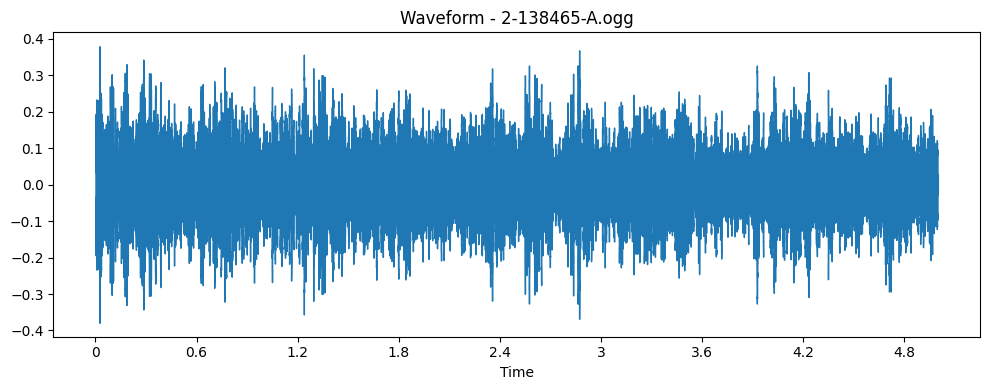

Воспроизведение аудио для 2-138465-A.ogg


Построение спектрограммы для 2-138465-A.ogg


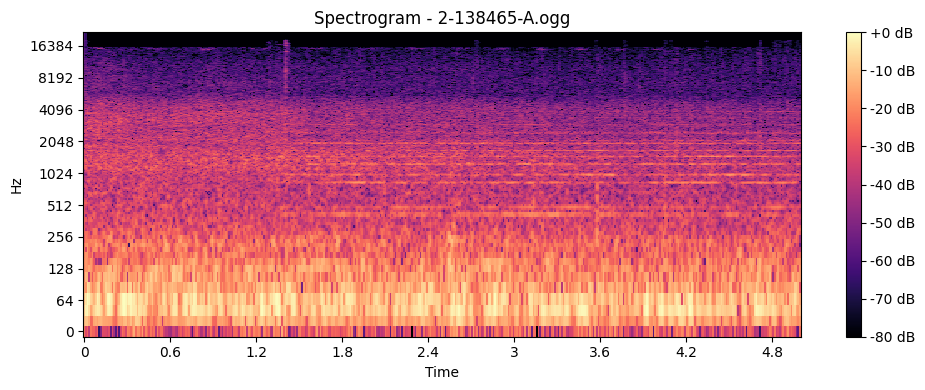

Извлечение MFCC для 2-138465-A.ogg


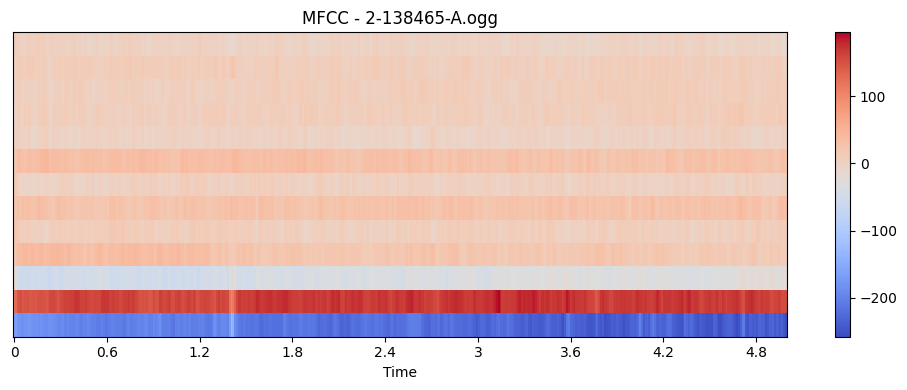

Построение волновой формы для 3-51376-A.ogg


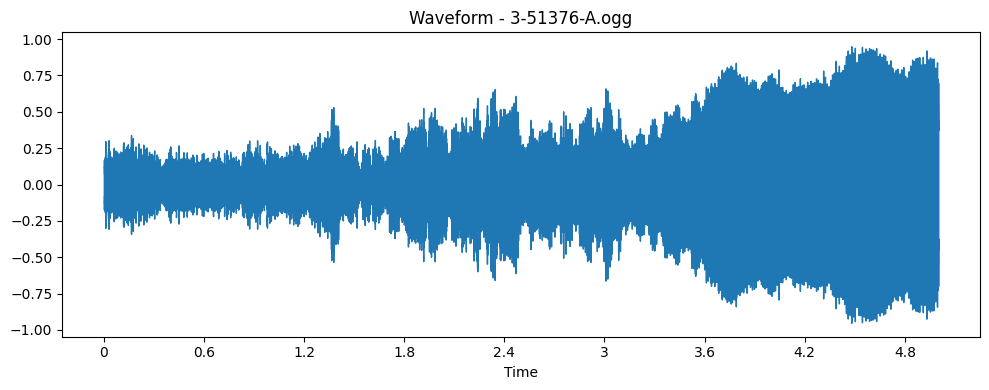

Воспроизведение аудио для 3-51376-A.ogg


Построение спектрограммы для 3-51376-A.ogg


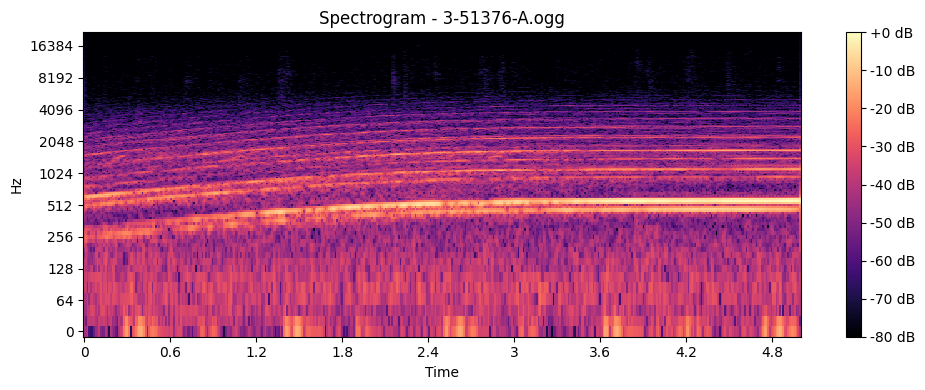

Извлечение MFCC для 3-51376-A.ogg


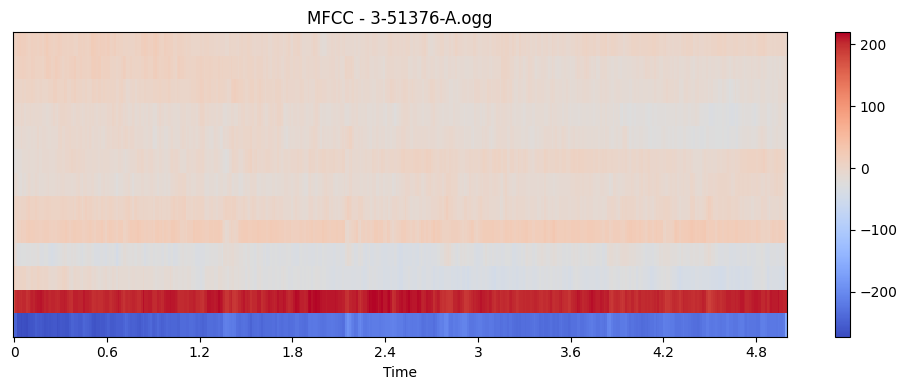

Построение волновой формы для laugh_1.m4a_1.wav


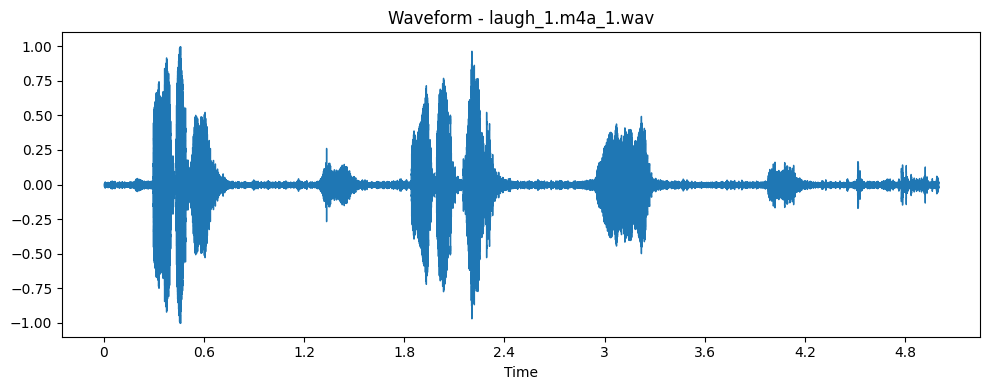

Воспроизведение аудио для laugh_1.m4a_1.wav


Построение спектрограммы для laugh_1.m4a_1.wav


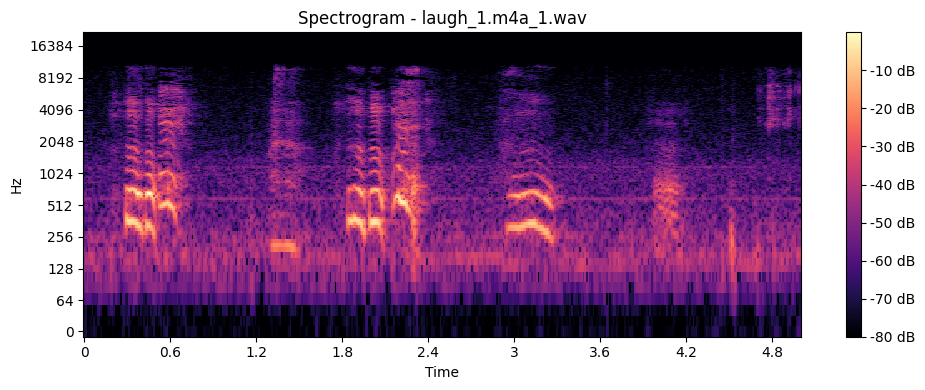

Извлечение MFCC для laugh_1.m4a_1.wav


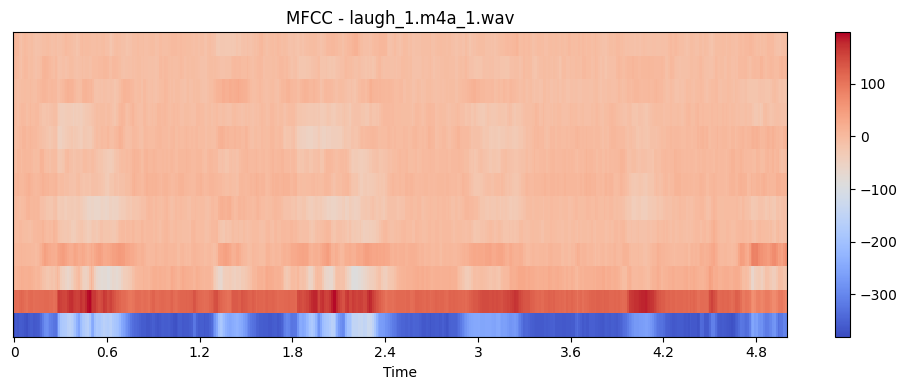

Построение волновой формы для Louise_01.m4a_1.wav


Воспроизведение аудио для Louise_01.m4a_1.wav


Построение спектрограммы для Louise_01.m4a_1.wav


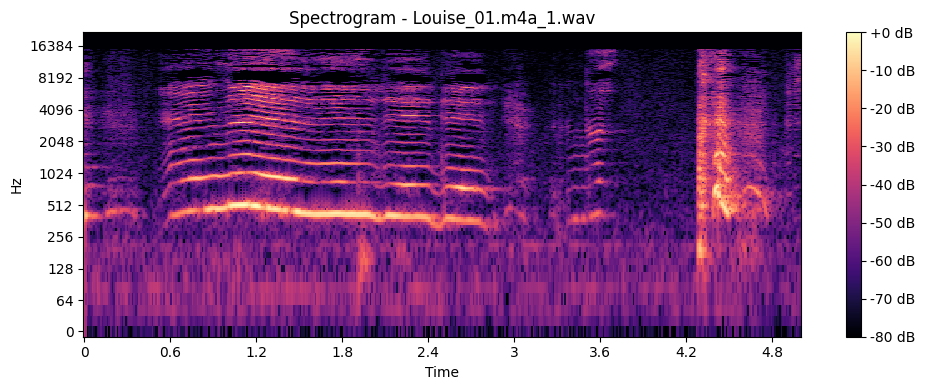

Извлечение MFCC для Louise_01.m4a_1.wav


Построение волновой формы для seg_1.wav


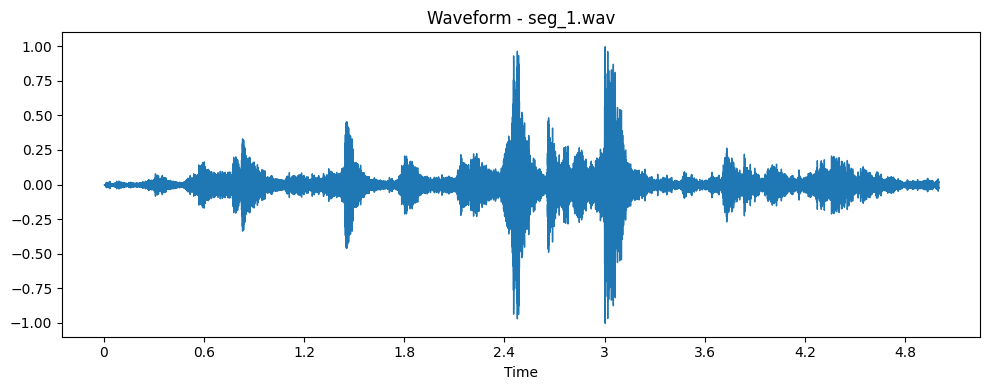

Воспроизведение аудио для seg_1.wav


Построение спектрограммы для seg_1.wav


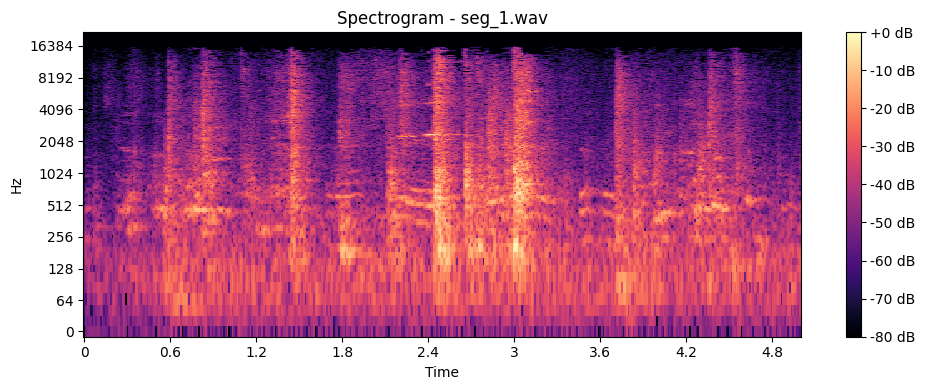

Извлечение MFCC для seg_1.wav


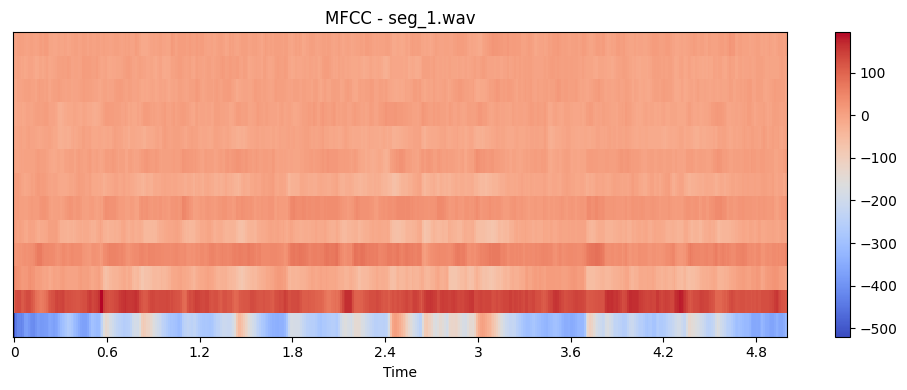

Построение волновой формы для sound_201.wav


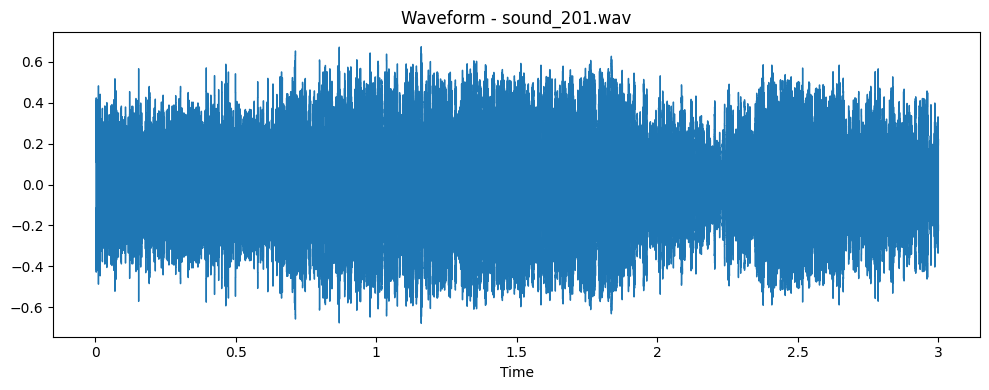

Воспроизведение аудио для sound_201.wav


Построение спектрограммы для sound_201.wav


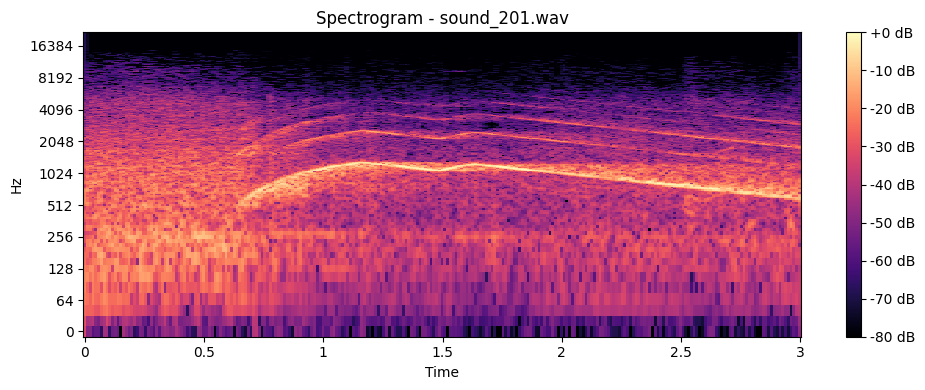

Извлечение MFCC для sound_201.wav


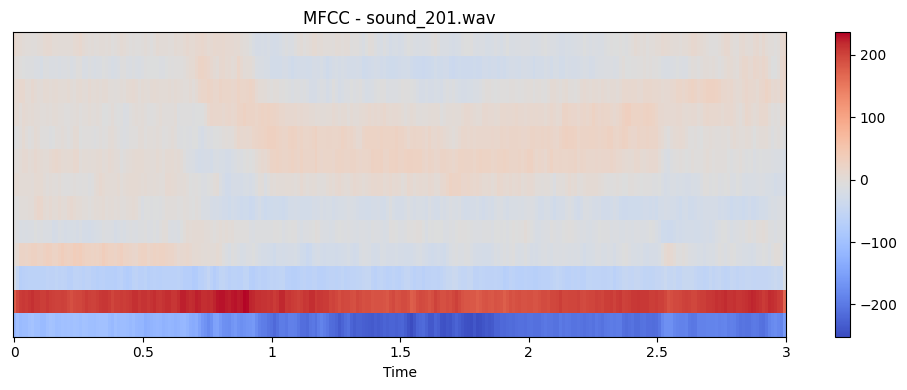

Построение волновой формы для sound_401.wav


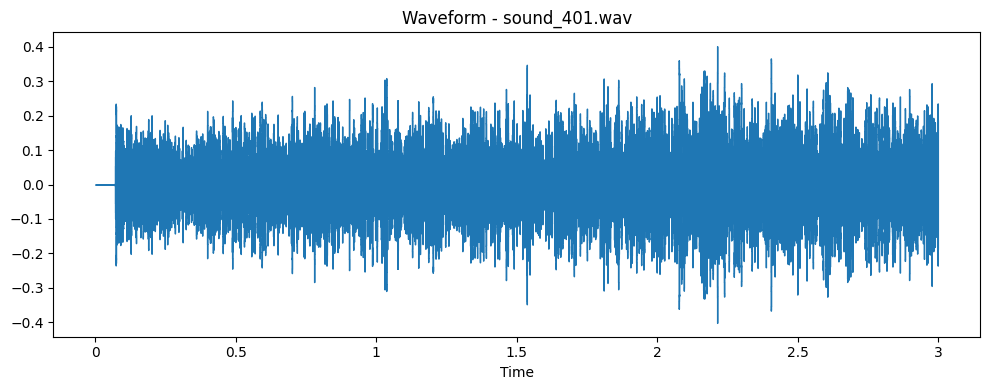

Воспроизведение аудио для sound_401.wav


Построение спектрограммы для sound_401.wav


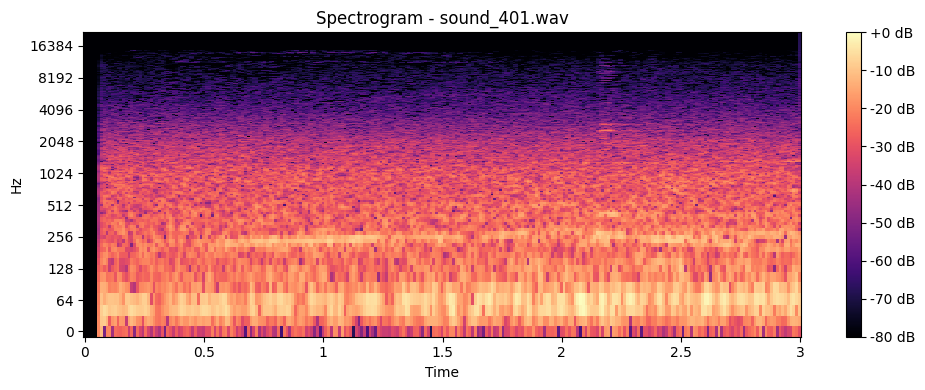

Извлечение MFCC для sound_401.wav


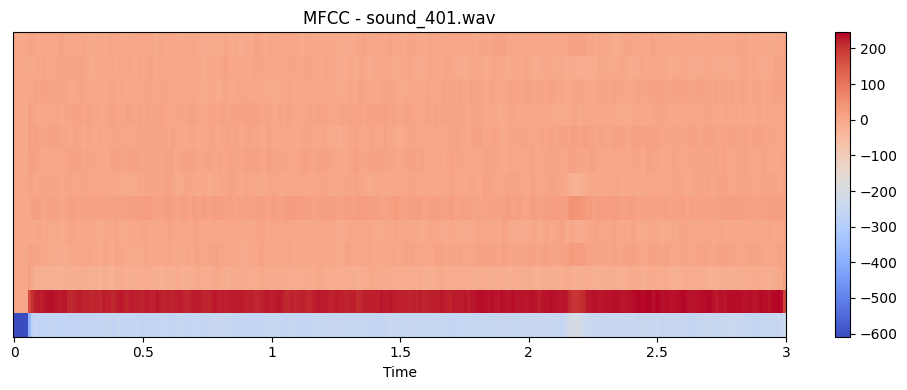

In [7]:
# Путь к аудиофайлам
dataset_path = 'E:/TALEB/Master/Sound Classification/spectograms&mfcc/data_test'

# Поддерживаемые расширения аудиофайлов
audio_extensions = ['.wav', '.ogg', '.mp3', '.flac', '.m4a', '.aiff']  

# Собираем файлы с подходящими расширениями
audio_files = [file for file in os.listdir(dataset_path) if os.path.splitext(file)[1].lower() in audio_extensions]

# Обрабатываем каждый аудиофайл
for file_name in audio_files:
    file_path = os.path.join(dataset_path, file_name)
    
    # Загрузка аудиофайла
    y, sr = load_audio(file_path)
    
    # Построение волновой формы
    print(f'Построение волновой формы для {file_name}')
    plot_waveform(y, sr, file_name)
    
    # Воспроизведение аудио
    print(f'Воспроизведение аудио для {file_name}')
    display(play_audio(y, sr))
    
    # Построение спектрограммы
    print(f'Построение спектрограммы для {file_name}')
    plot_spectrogram(y, sr, file_name)
    
    # Извлечение и визуализация MFCC
    print(f'Извлечение MFCC для {file_name}')
    plot_mfcc(y, sr, file_name)
